In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [4]:
df = '/content/drive/MyDrive/DataSet/car.csv'
data = pd.read_csv(df, sep=',', encoding='cp949')
data

,행정구역별(1),행정구역별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7
0,행정구역별(1),행정구역별(2),주민등록인구수(등록외국인포함) (명),1인당자동차등록대수 (대),차종별 (대),차종별 (대),차종별 (대),차종별 (대),차종별 (대),2륜차 (대)
1,행정구역별(1),행정구역별(2),소계,소계,소계,승용차,승합차,화물차,특수차,소계
2,총계,소계,"52,916,415",0.5,"24,365,709","19,860,955","783,842","3,614,975","105,937","2,284,974"
3,서울특별시,소계,"9,911,088",0.3,"3,157,361","2,711,984","106,504","329,943","8,930","459,002"
4,NaN,종로구,"158,996",0.3,"50,267","41,197","3,726","5,149",195,"13,212"
...,...,...,...,...,...,...,...,...,...,...
243,NaN,거창군,"62,005",0.5,"32,974","22,376","1,171","9,198",229,"7,873"
244,NaN,합천군,"44,582",0.5,"23,965","14,739",789,"8,333",104,"5,185"
245,제주특별자치도,소계,"697,578",0.9,"615,342","513,493","18,844","81,588","1,417","33,173"
246,NaN,제주시,"507,358",1.0,"509,181","439,674","15,271","53,175","1,061","20,163"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정구역별(1)  20 non-null     object
 1   행정구역별(2)  248 non-null    object
 2   2020      248 non-null    object
 3   2020.1    248 non-null    object
 4   2020.2    248 non-null    object
 5   2020.3    248 non-null    object
 6   2020.4    248 non-null    object
 7   2020.5    248 non-null    object
 8   2020.6    248 non-null    object
 9   2020.7    248 non-null    object
dtypes: object(10)
memory usage: 19.5+ KB


In [6]:
data = data.fillna(method='ffill')

In [7]:
data.rename(columns={'2020':'주민등록인구수(명)'}, inplace=True)
data.rename(columns={'2020.1':'1인당자동차등록대수(대)'}, inplace=True)
data.rename(columns={'2020.2':'차종별합계(대)'}, inplace=True)
data.rename(columns={'2020.3':'승용차별(대)'}, inplace=True)
data.rename(columns={'2020.4':'승합차별(대)'}, inplace=True)
data.rename(columns={'2020.5':'화물차별(대)'}, inplace=True)
data.rename(columns={'2020.6':'특수차별(대)'}, inplace=True)
data.rename(columns={'2020.7':'2륜차합계(대)'}, inplace=True)

In [8]:
data

,행정구역별(1),행정구역별(2),주민등록인구수(명),1인당자동차등록대수(대),차종별합계(대),승용차별(대),승합차별(대),화물차별(대),특수차별(대),2륜차합계(대)
0,행정구역별(1),행정구역별(2),주민등록인구수(등록외국인포함) (명),1인당자동차등록대수 (대),차종별 (대),차종별 (대),차종별 (대),차종별 (대),차종별 (대),2륜차 (대)
1,행정구역별(1),행정구역별(2),소계,소계,소계,승용차,승합차,화물차,특수차,소계
2,총계,소계,"52,916,415",0.5,"24,365,709","19,860,955","783,842","3,614,975","105,937","2,284,974"
3,서울특별시,소계,"9,911,088",0.3,"3,157,361","2,711,984","106,504","329,943","8,930","459,002"
4,서울특별시,종로구,"158,996",0.3,"50,267","41,197","3,726","5,149",195,"13,212"
...,...,...,...,...,...,...,...,...,...,...
243,경상남도,거창군,"62,005",0.5,"32,974","22,376","1,171","9,198",229,"7,873"
244,경상남도,합천군,"44,582",0.5,"23,965","14,739",789,"8,333",104,"5,185"
245,제주특별자치도,소계,"697,578",0.9,"615,342","513,493","18,844","81,588","1,417","33,173"
246,제주특별자치도,제주시,"507,358",1.0,"509,181","439,674","15,271","53,175","1,061","20,163"


In [9]:
data.drop([0, 1], axis=0, inplace=True)

In [10]:
data

,행정구역별(1),행정구역별(2),주민등록인구수(명),1인당자동차등록대수(대),차종별합계(대),승용차별(대),승합차별(대),화물차별(대),특수차별(대),2륜차합계(대)
2,총계,소계,"52,916,415",0.5,"24,365,709","19,860,955","783,842","3,614,975","105,937","2,284,974"
3,서울특별시,소계,"9,911,088",0.3,"3,157,361","2,711,984","106,504","329,943","8,930","459,002"
4,서울특별시,종로구,"158,996",0.3,"50,267","41,197","3,726","5,149",195,"13,212"
5,서울특별시,중구,"134,635",0.4,"51,126","40,804","3,244","6,848",230,"14,428"
6,서울특별시,용산구,"244,645",0.3,"78,995","69,884","2,280","6,707",124,"16,769"
...,...,...,...,...,...,...,...,...,...,...
243,경상남도,거창군,"62,005",0.5,"32,974","22,376","1,171","9,198",229,"7,873"
244,경상남도,합천군,"44,582",0.5,"23,965","14,739",789,"8,333",104,"5,185"
245,제주특별자치도,소계,"697,578",0.9,"615,342","513,493","18,844","81,588","1,417","33,173"
246,제주특별자치도,제주시,"507,358",1.0,"509,181","439,674","15,271","53,175","1,061","20,163"


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 2 to 247
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   행정구역별(1)       246 non-null    object
 1   행정구역별(2)       246 non-null    object
 2   주민등록인구수(명)     246 non-null    object
 3   1인당자동차등록대수(대)  246 non-null    object
 4   차종별합계(대)       246 non-null    object
 5   승용차별(대)        246 non-null    object
 6   승합차별(대)        246 non-null    object
 7   화물차별(대)        246 non-null    object
 8   특수차별(대)        246 non-null    object
 9   2륜차합계(대)       246 non-null    object
dtypes: object(10)
memory usage: 19.3+ KB


In [12]:
data['주민등록인구수(명)'] = data['주민등록인구수(명)'].str.replace(',', '').astype('float64')
data['1인당자동차등록대수(대)'] = data['1인당자동차등록대수(대)'].str.replace(',', '').astype('float64')
data['차종별합계(대)'] = data['차종별합계(대)'].str.replace(',', '').astype('float64')
data['승용차별(대)'] = data['승용차별(대)'].str.replace(',', '').astype('float64')
data['승합차별(대)'] = data['승합차별(대)'].str.replace(',', '').astype('float64')
data['화물차별(대)'] = data['화물차별(대)'].str.replace(',', '').astype('float64')
data['특수차별(대)'] = data['특수차별(대)'].str.replace(',', '').astype('float64')
data['2륜차합계(대)'] = data['2륜차합계(대)'].str.replace(',', '').astype('float64')

In [13]:
data

,행정구역별(1),행정구역별(2),주민등록인구수(명),1인당자동차등록대수(대),차종별합계(대),승용차별(대),승합차별(대),화물차별(대),특수차별(대),2륜차합계(대)
2,총계,소계,52916415.0,0.5,24365709.0,19860955.0,783842.0,3614975.0,105937.0,2284974.0
3,서울특별시,소계,9911088.0,0.3,3157361.0,2711984.0,106504.0,329943.0,8930.0,459002.0
4,서울특별시,종로구,158996.0,0.3,50267.0,41197.0,3726.0,5149.0,195.0,13212.0
5,서울특별시,중구,134635.0,0.4,51126.0,40804.0,3244.0,6848.0,230.0,14428.0
6,서울특별시,용산구,244645.0,0.3,78995.0,69884.0,2280.0,6707.0,124.0,16769.0
...,...,...,...,...,...,...,...,...,...,...
243,경상남도,거창군,62005.0,0.5,32974.0,22376.0,1171.0,9198.0,229.0,7873.0
244,경상남도,합천군,44582.0,0.5,23965.0,14739.0,789.0,8333.0,104.0,5185.0
245,제주특별자치도,소계,697578.0,0.9,615342.0,513493.0,18844.0,81588.0,1417.0,33173.0
246,제주특별자치도,제주시,507358.0,1.0,509181.0,439674.0,15271.0,53175.0,1061.0,20163.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 2 to 247
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역별(1)       246 non-null    object 
 1   행정구역별(2)       246 non-null    object 
 2   주민등록인구수(명)     246 non-null    float64
 3   1인당자동차등록대수(대)  246 non-null    float64
 4   차종별합계(대)       246 non-null    float64
 5   승용차별(대)        246 non-null    float64
 6   승합차별(대)        246 non-null    float64
 7   화물차별(대)        246 non-null    float64
 8   특수차별(대)        246 non-null    float64
 9   2륜차합계(대)       246 non-null    float64
dtypes: float64(8), object(2)
memory usage: 19.3+ KB


In [15]:
data.columns

Index(['행정구역별(1)', '행정구역별(2)', '주민등록인구수(명)', '1인당자동차등록대수(대)', '차종별합계(대)',
       '승용차별(대)', '승합차별(대)', '화물차별(대)', '특수차별(대)', '2륜차합계(대)'],
      dtype='object')

In [16]:
def getCatCol(data):
    cat_columns = []
    for col in data.columns:
        if data[col].dtype == 'object':
            cat_columns.append(col)
    return cat_columns

In [17]:
cat_columns = getCatCol(data)

In [18]:
num_columns = [x for x in data.columns if x not in cat_columns]

In [19]:
print(data.columns)
print(cat_columns)
print(num_columns)

Index(['행정구역별(1)', '행정구역별(2)', '주민등록인구수(명)', '1인당자동차등록대수(대)', '차종별합계(대)',
       '승용차별(대)', '승합차별(대)', '화물차별(대)', '특수차별(대)', '2륜차합계(대)'],
      dtype='object')
['행정구역별(1)', '행정구역별(2)']
['주민등록인구수(명)', '1인당자동차등록대수(대)', '차종별합계(대)', '승용차별(대)', '승합차별(대)', '화물차별(대)', '특수차별(대)', '2륜차합계(대)']


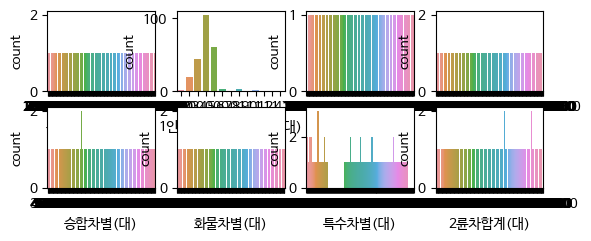

In [20]:
plt.subplot(4, 4, 1)
sns.countplot(data = data, x = "주민등록인구수(명)")

plt.subplot(4, 4, 2)
sns.countplot(data = data, x = "1인당자동차등록대수(대)")

plt.subplot(4, 4, 3)
sns.countplot(data = data, x = "차종별합계(대)")

plt.subplot(4, 4, 4)
sns.countplot(data = data, x = "승용차별(대)")

plt.subplot(4, 4, 5)
sns.countplot(data = data, x = "승합차별(대)")

plt.subplot(4, 4, 6)
sns.countplot(data = data, x = "화물차별(대)")

plt.subplot(4, 4, 7)
sns.countplot(data = data, x = "특수차별(대)")

plt.subplot(4, 4, 8)
sns.countplot(data = data, x = "2륜차합계(대)")

plt.show()

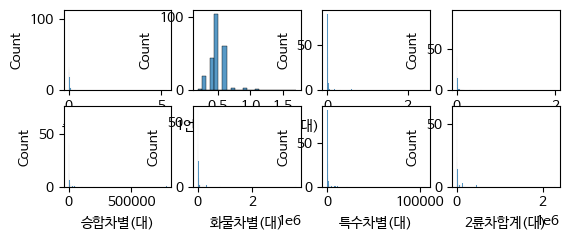

In [21]:
plt.subplot(4, 4, 1)
sns.histplot(data = data, x = "주민등록인구수(명)")

plt.subplot(4, 4, 2)
sns.histplot(data = data, x = "1인당자동차등록대수(대)")

plt.subplot(4, 4, 3)
sns.histplot(data = data, x = "차종별합계(대)")

plt.subplot(4, 4, 4)
sns.histplot(data = data, x = "승용차별(대)")

plt.subplot(4, 4, 5)
sns.histplot(data = data, x = "승합차별(대)")

plt.subplot(4, 4, 6)
sns.histplot(data = data, x = "화물차별(대)")

plt.subplot(4, 4, 7)
sns.histplot(data = data, x = "특수차별(대)")

plt.subplot(4, 4, 8)
sns.histplot(data = data, x = "2륜차합계(대)")

plt.show()

In [22]:
data.describe()

,주민등록인구수(명),1인당자동차등록대수(대),차종별합계(대),승용차별(대),승합차별(대),화물차별(대),특수차별(대),2륜차합계(대)
count,2.460000e+02,246.000000,2.460000e+02,2.460000e+02,246.000000,2.460000e+02,246.000000,2.460000e+02
mean,6.438550e+05,0.514634,2.964325e+05,2.415835e+05,9541.390244,4.401763e+04,1289.963415,2.779201e+04
std,3.545349e+06,0.161464,1.617973e+06,1.320821e+06,52208.274807,2.386688e+05,6985.568016,1.514612e+05
min,9.227000e+03,0.200000,5.753000e+03,3.914000e+03,363.000000,1.379000e+03,23.000000,1.073000e+03
25%,5.659075e+04,0.400000,3.218400e+04,2.237375e+04,1191.250000,8.077250e+03,137.750000,4.978750e+03
50%,1.761130e+05,0.500000,8.685950e+04,6.762250e+04,2895.000000,1.303750e+04,344.500000,8.712000e+03
75%,4.055065e+05,0.600000,1.701348e+05,1.377685e+05,4799.750000,2.198375e+04,734.250000,1.575700e+04
max,5.291642e+07,1.700000,2.436571e+07,1.986096e+07,783842.000000,3.614975e+06,105937.000000,2.284974e+06


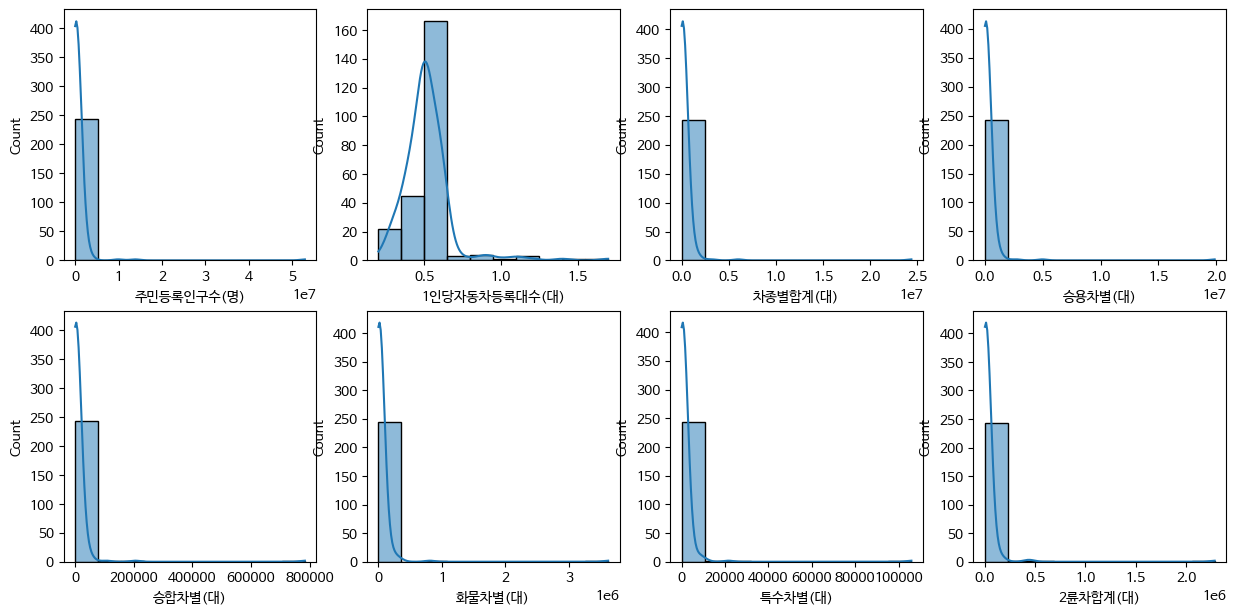

In [23]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  plt.subplot(4, 4, i+1)
  sns.histplot(data = data, x = num_columns[i],
      bins = 10,
      kde = True,
      );

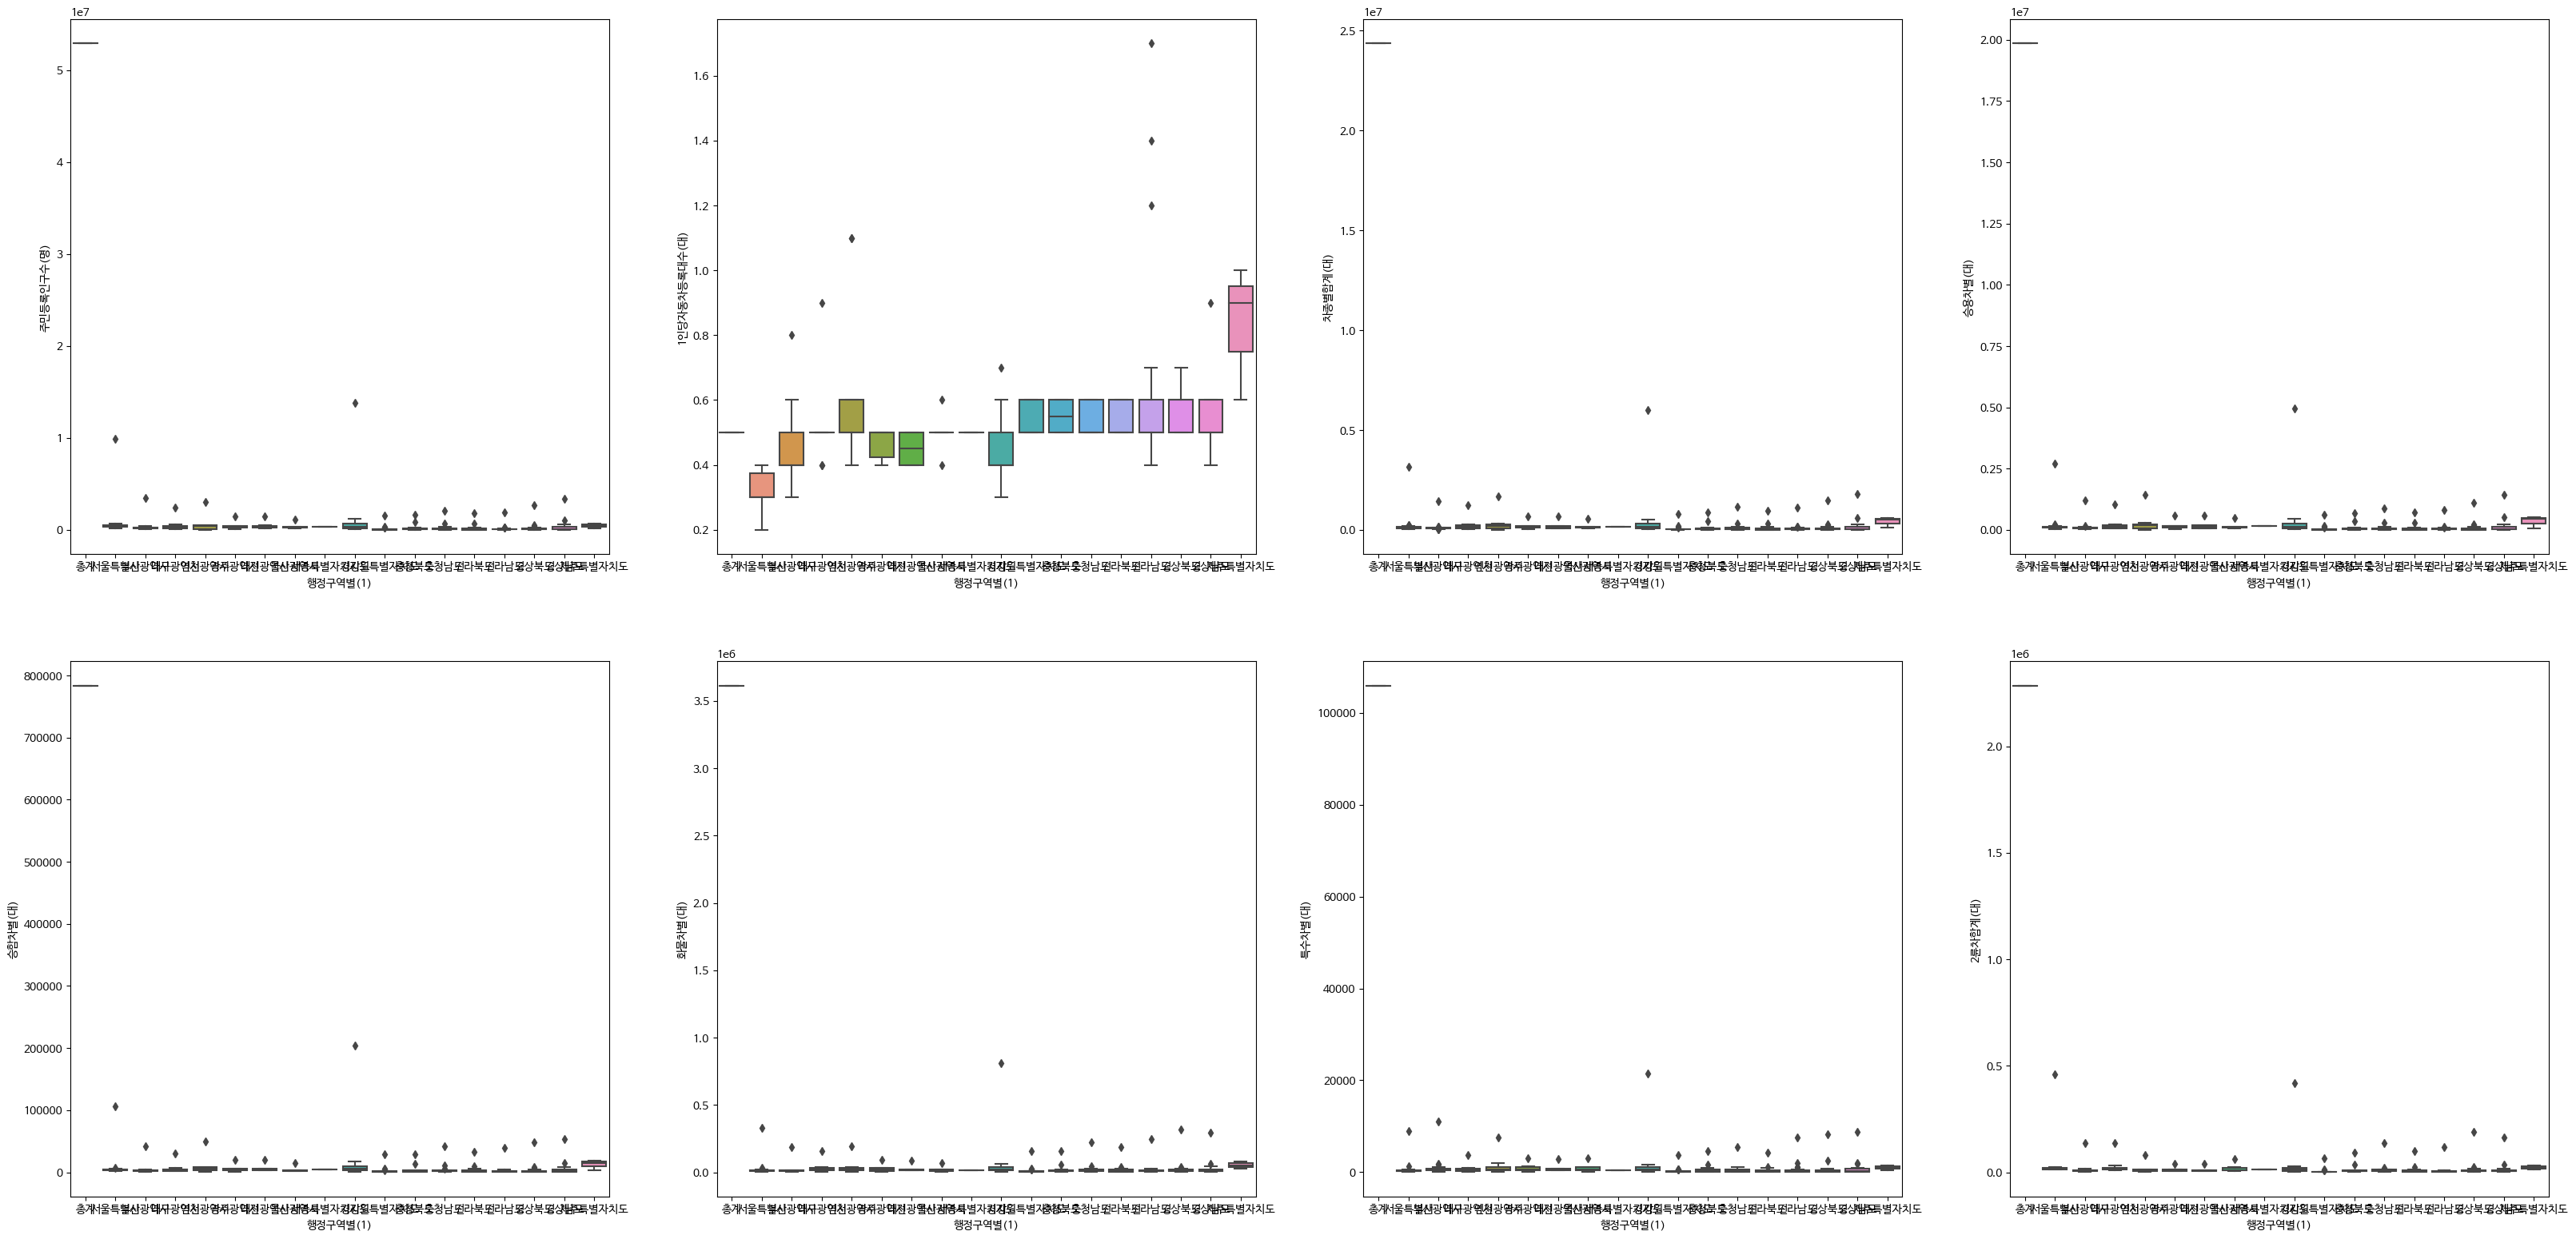

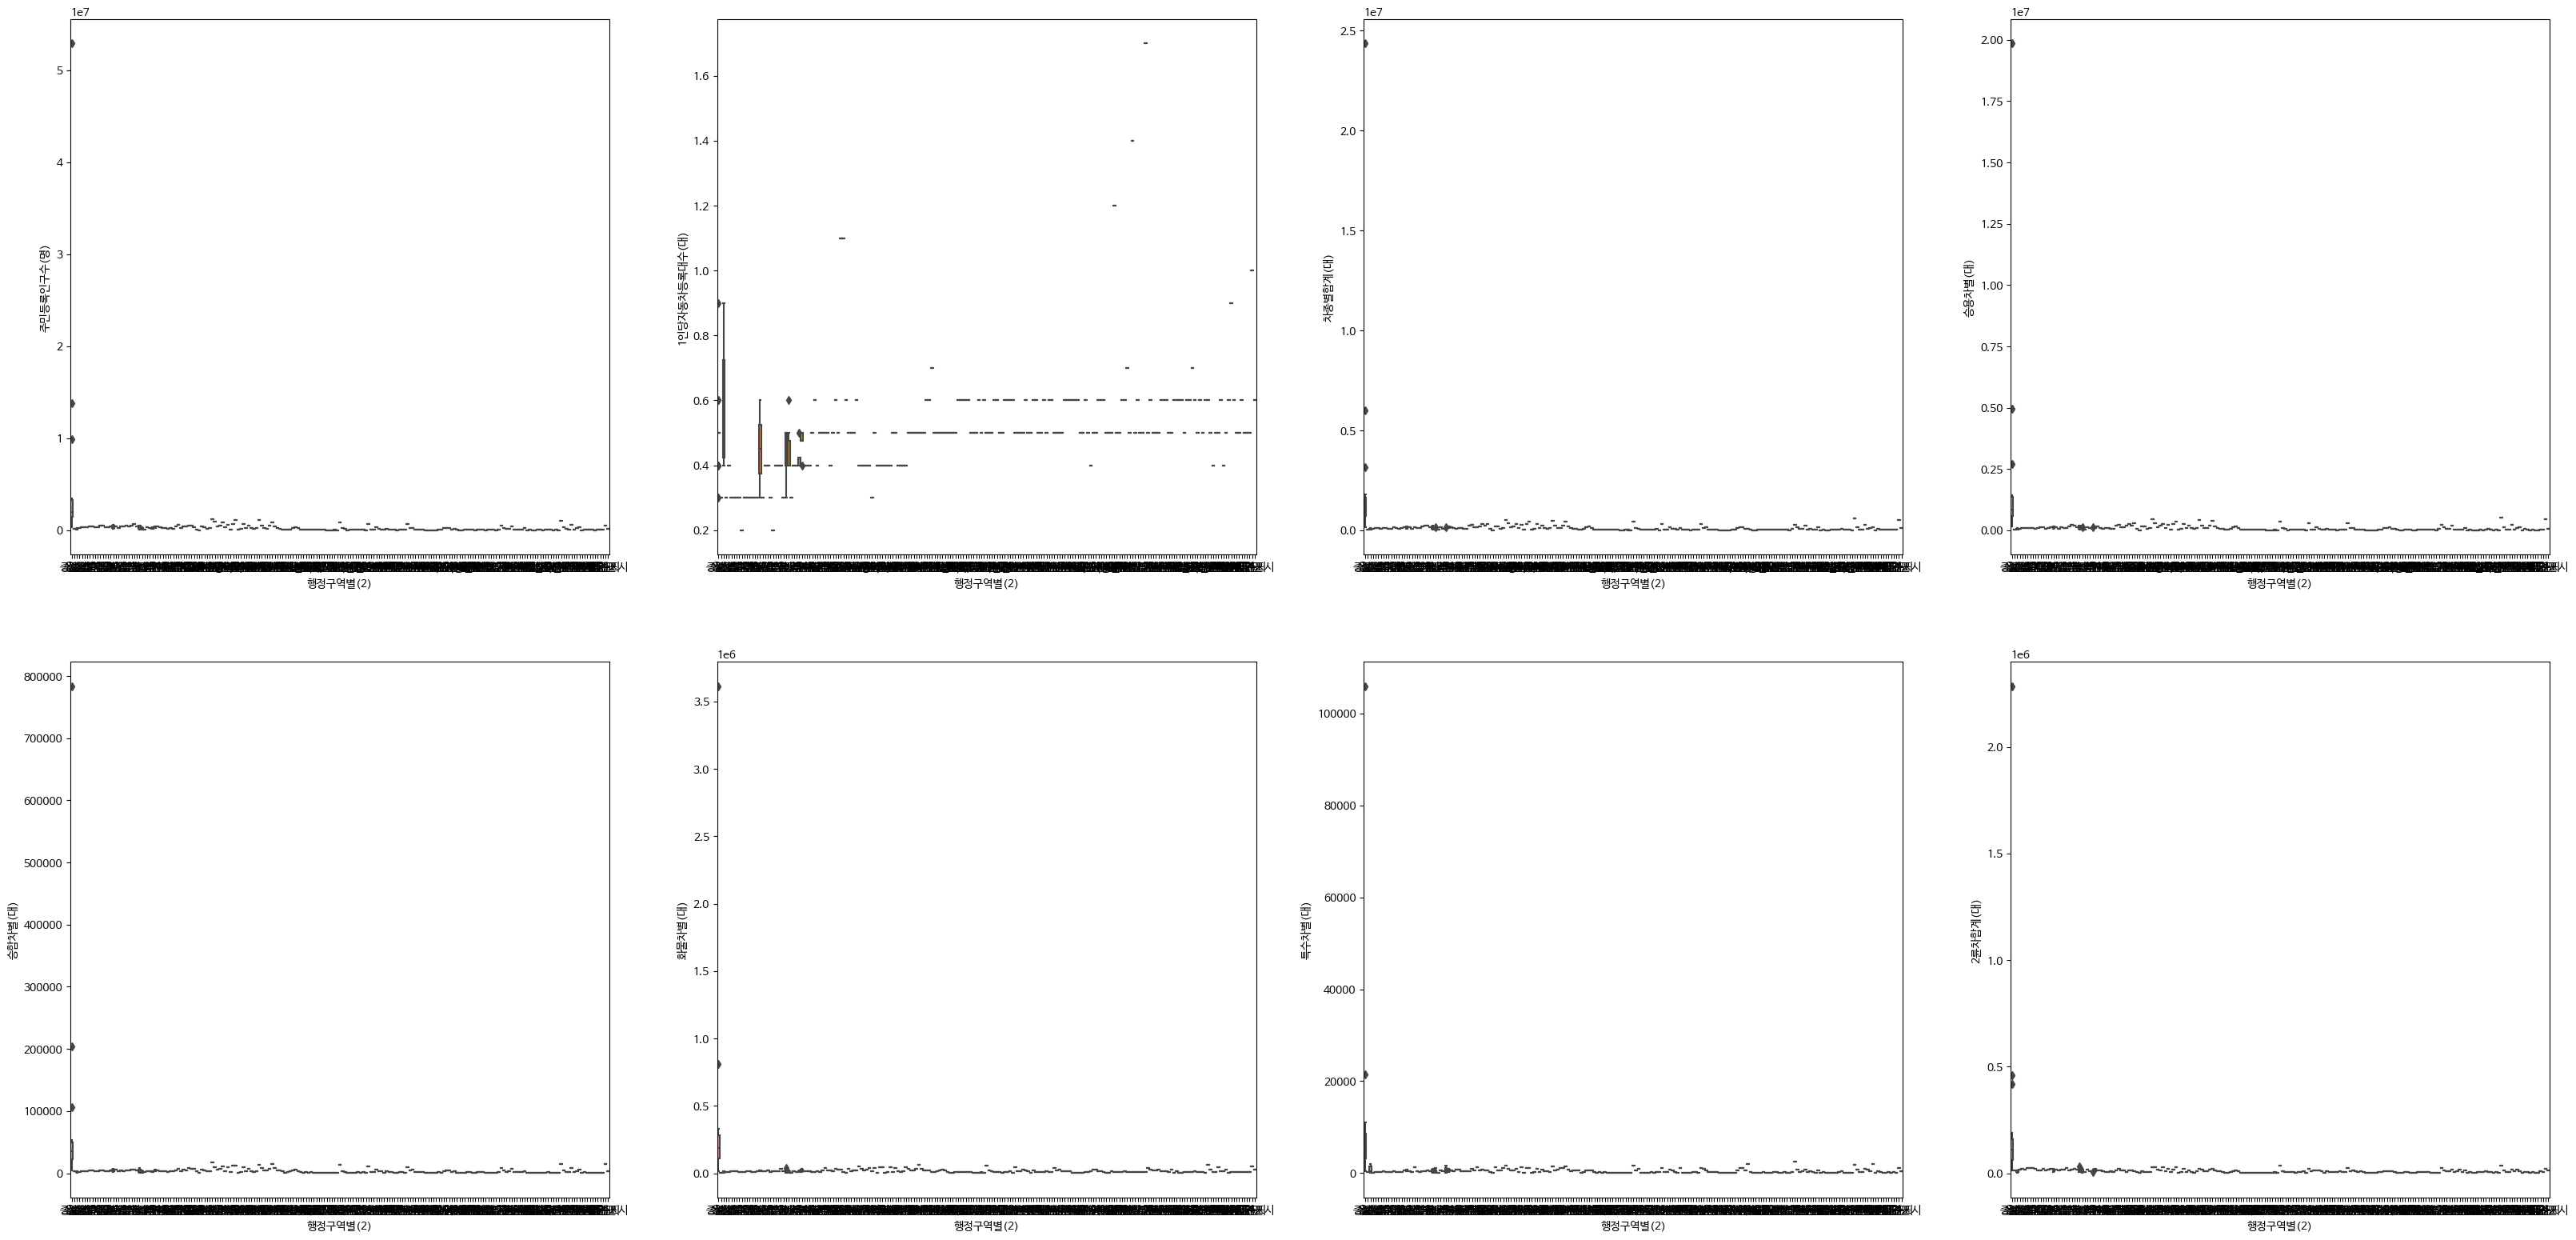

In [24]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "행정구역별(1)", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "행정구역별(2)", y = num_columns[i])

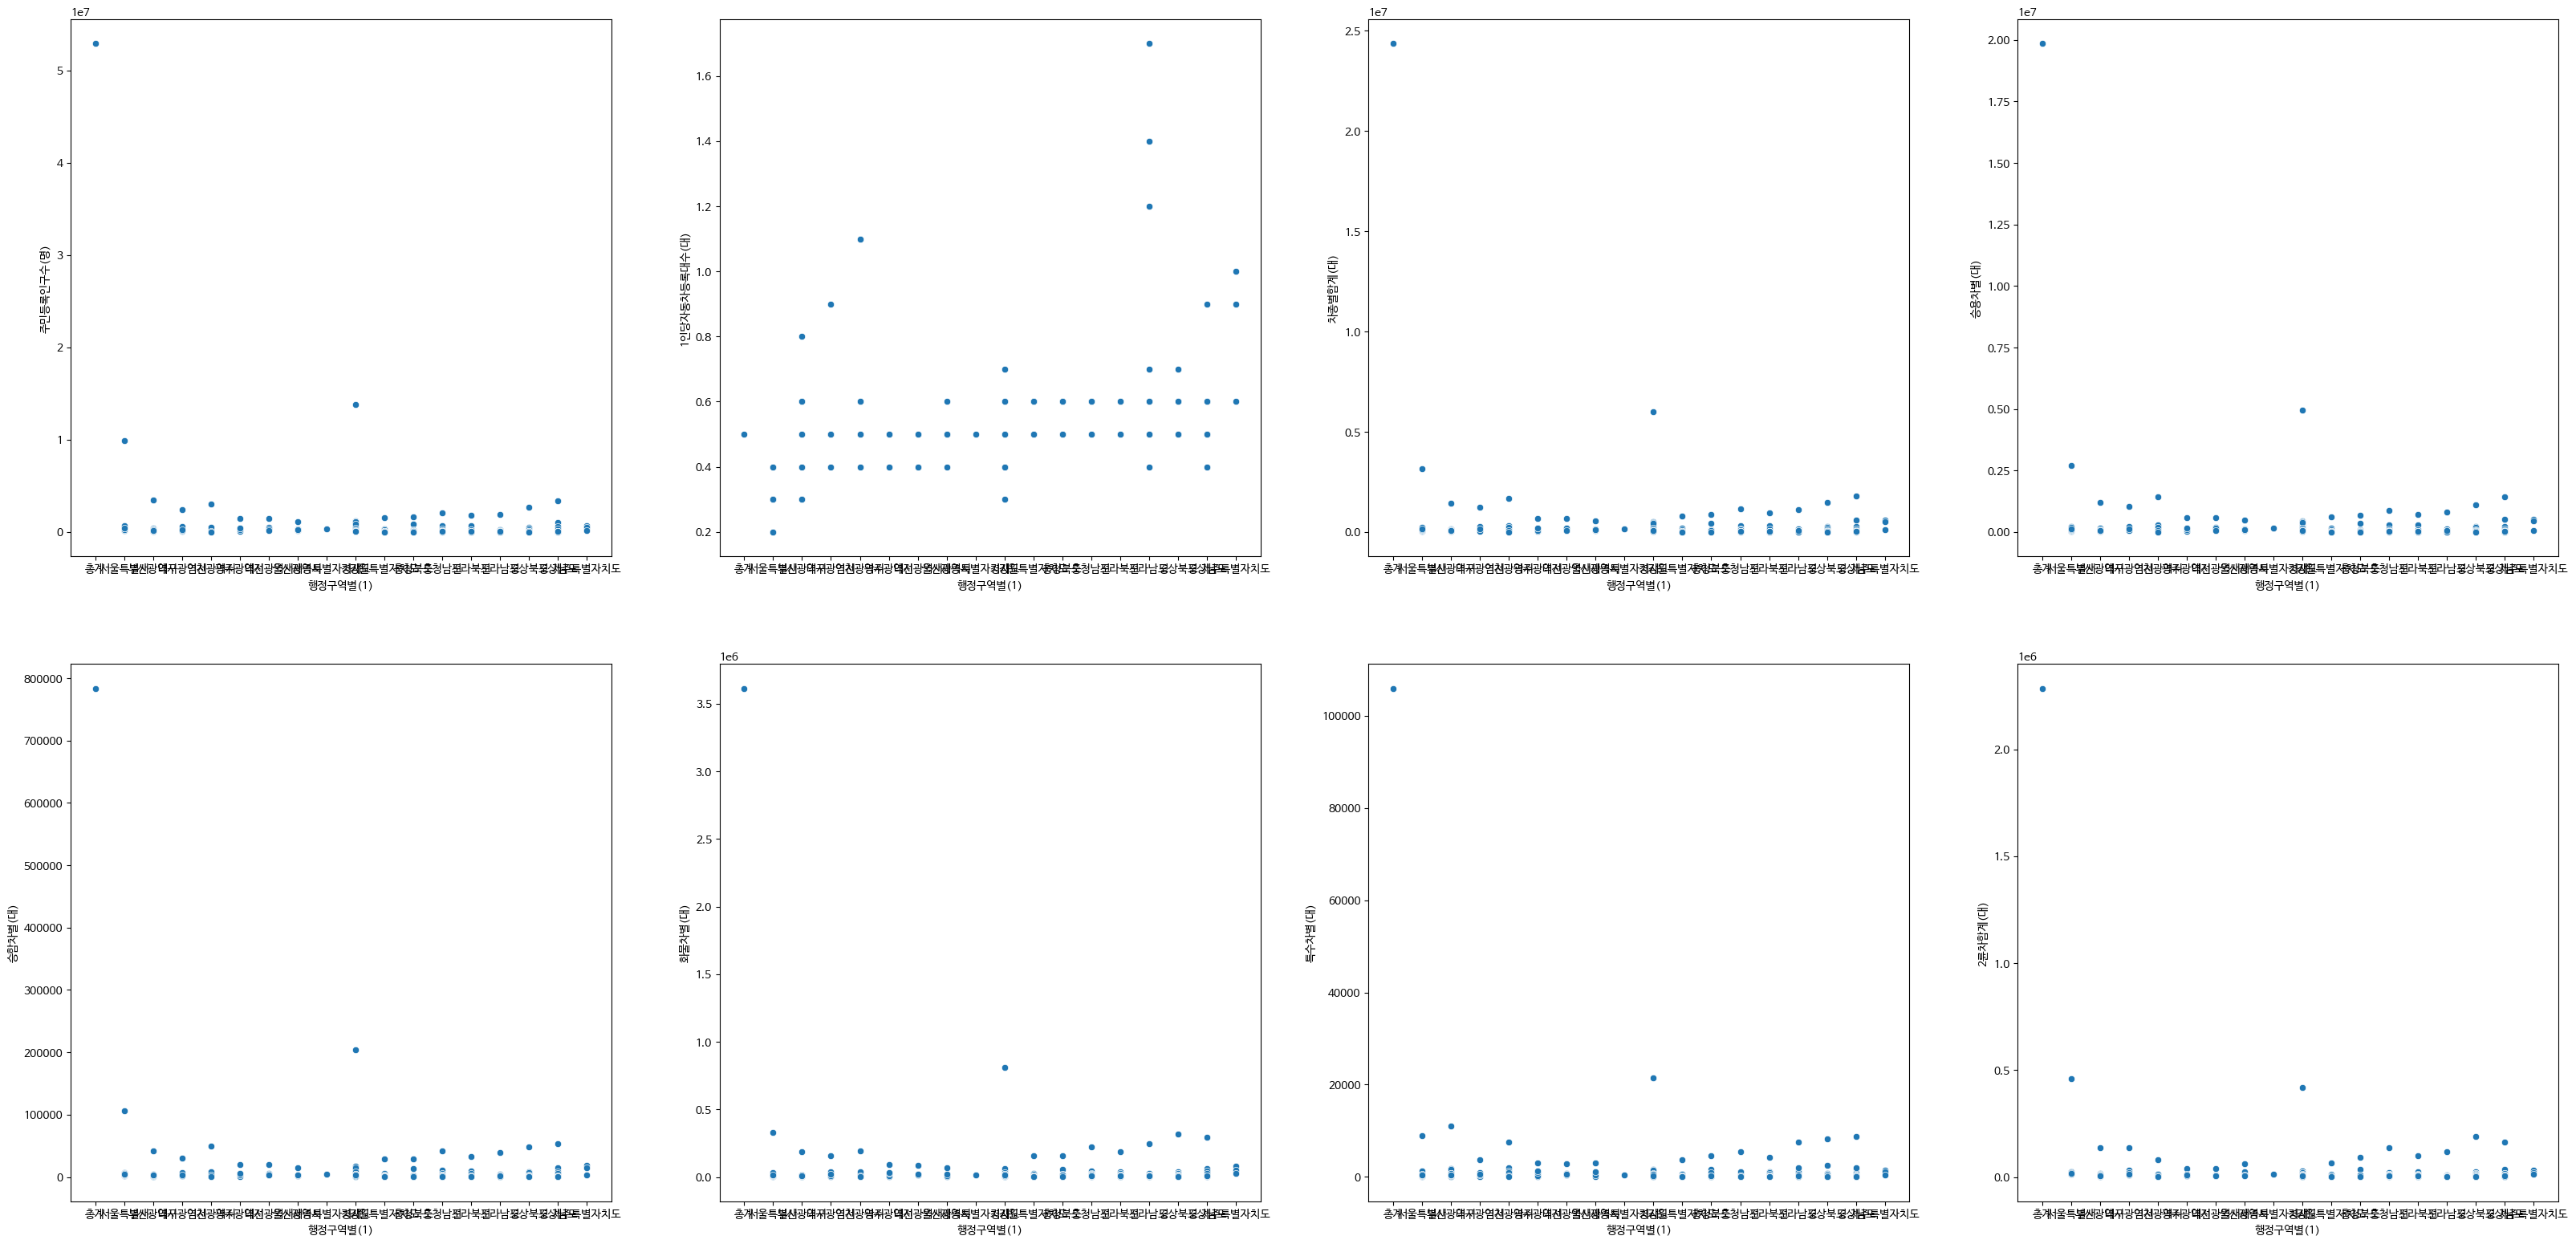

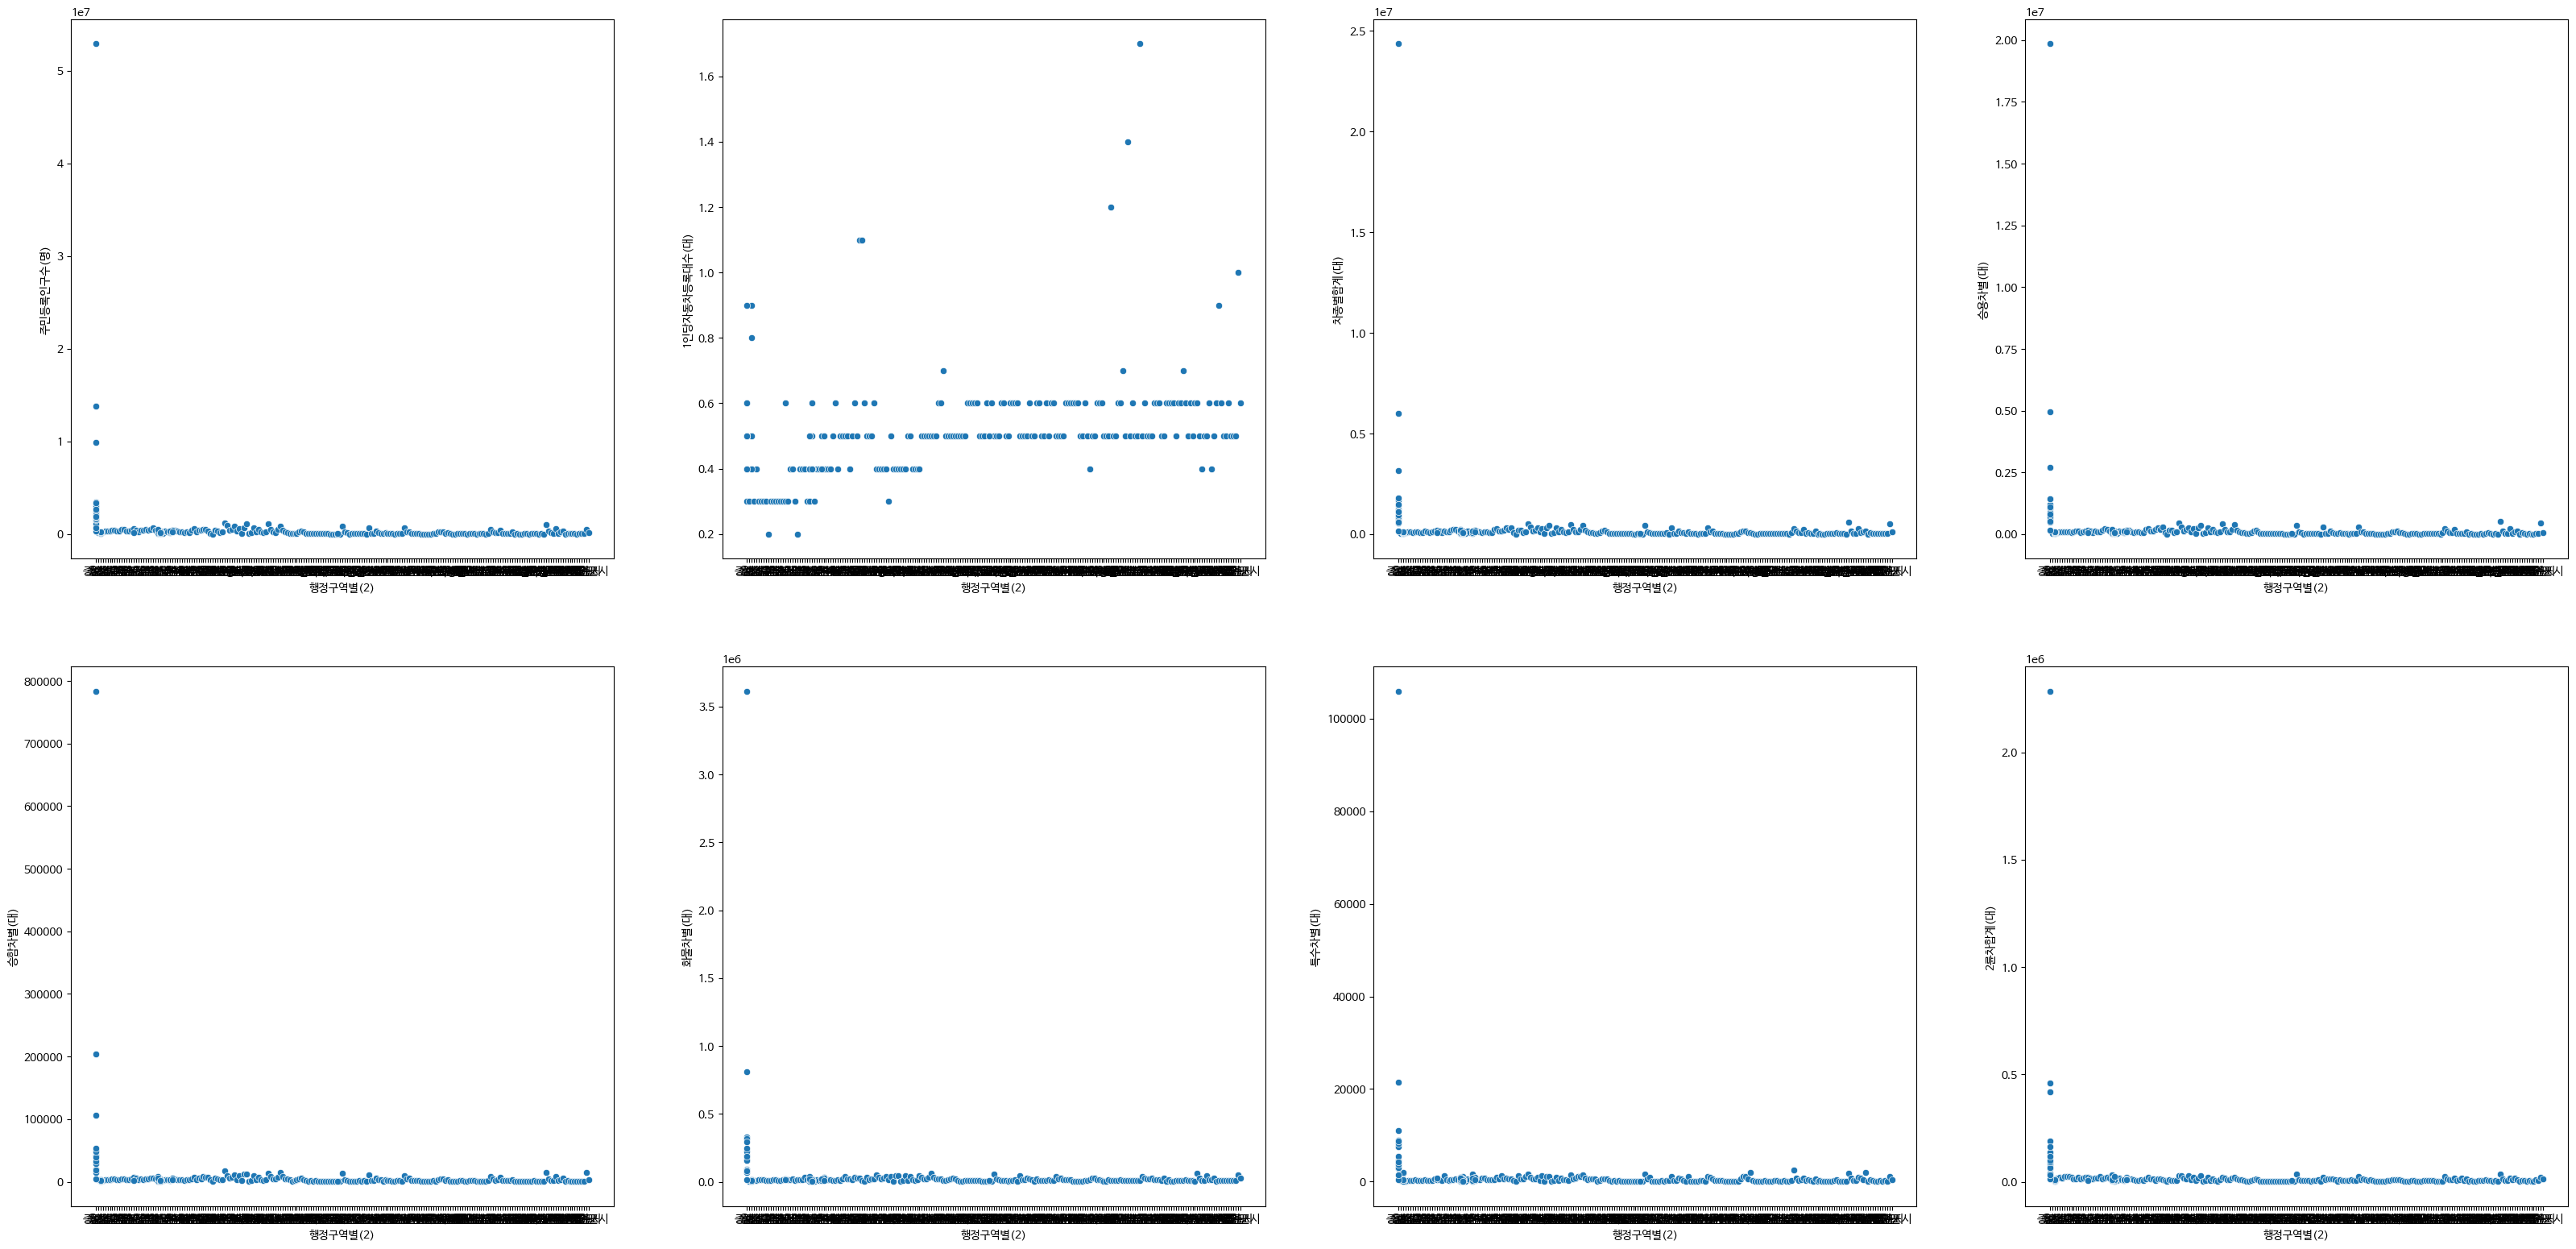

In [25]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.scatterplot(data = data, x = "행정구역별(1)", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.scatterplot(data = data, x = "행정구역별(2)", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect co

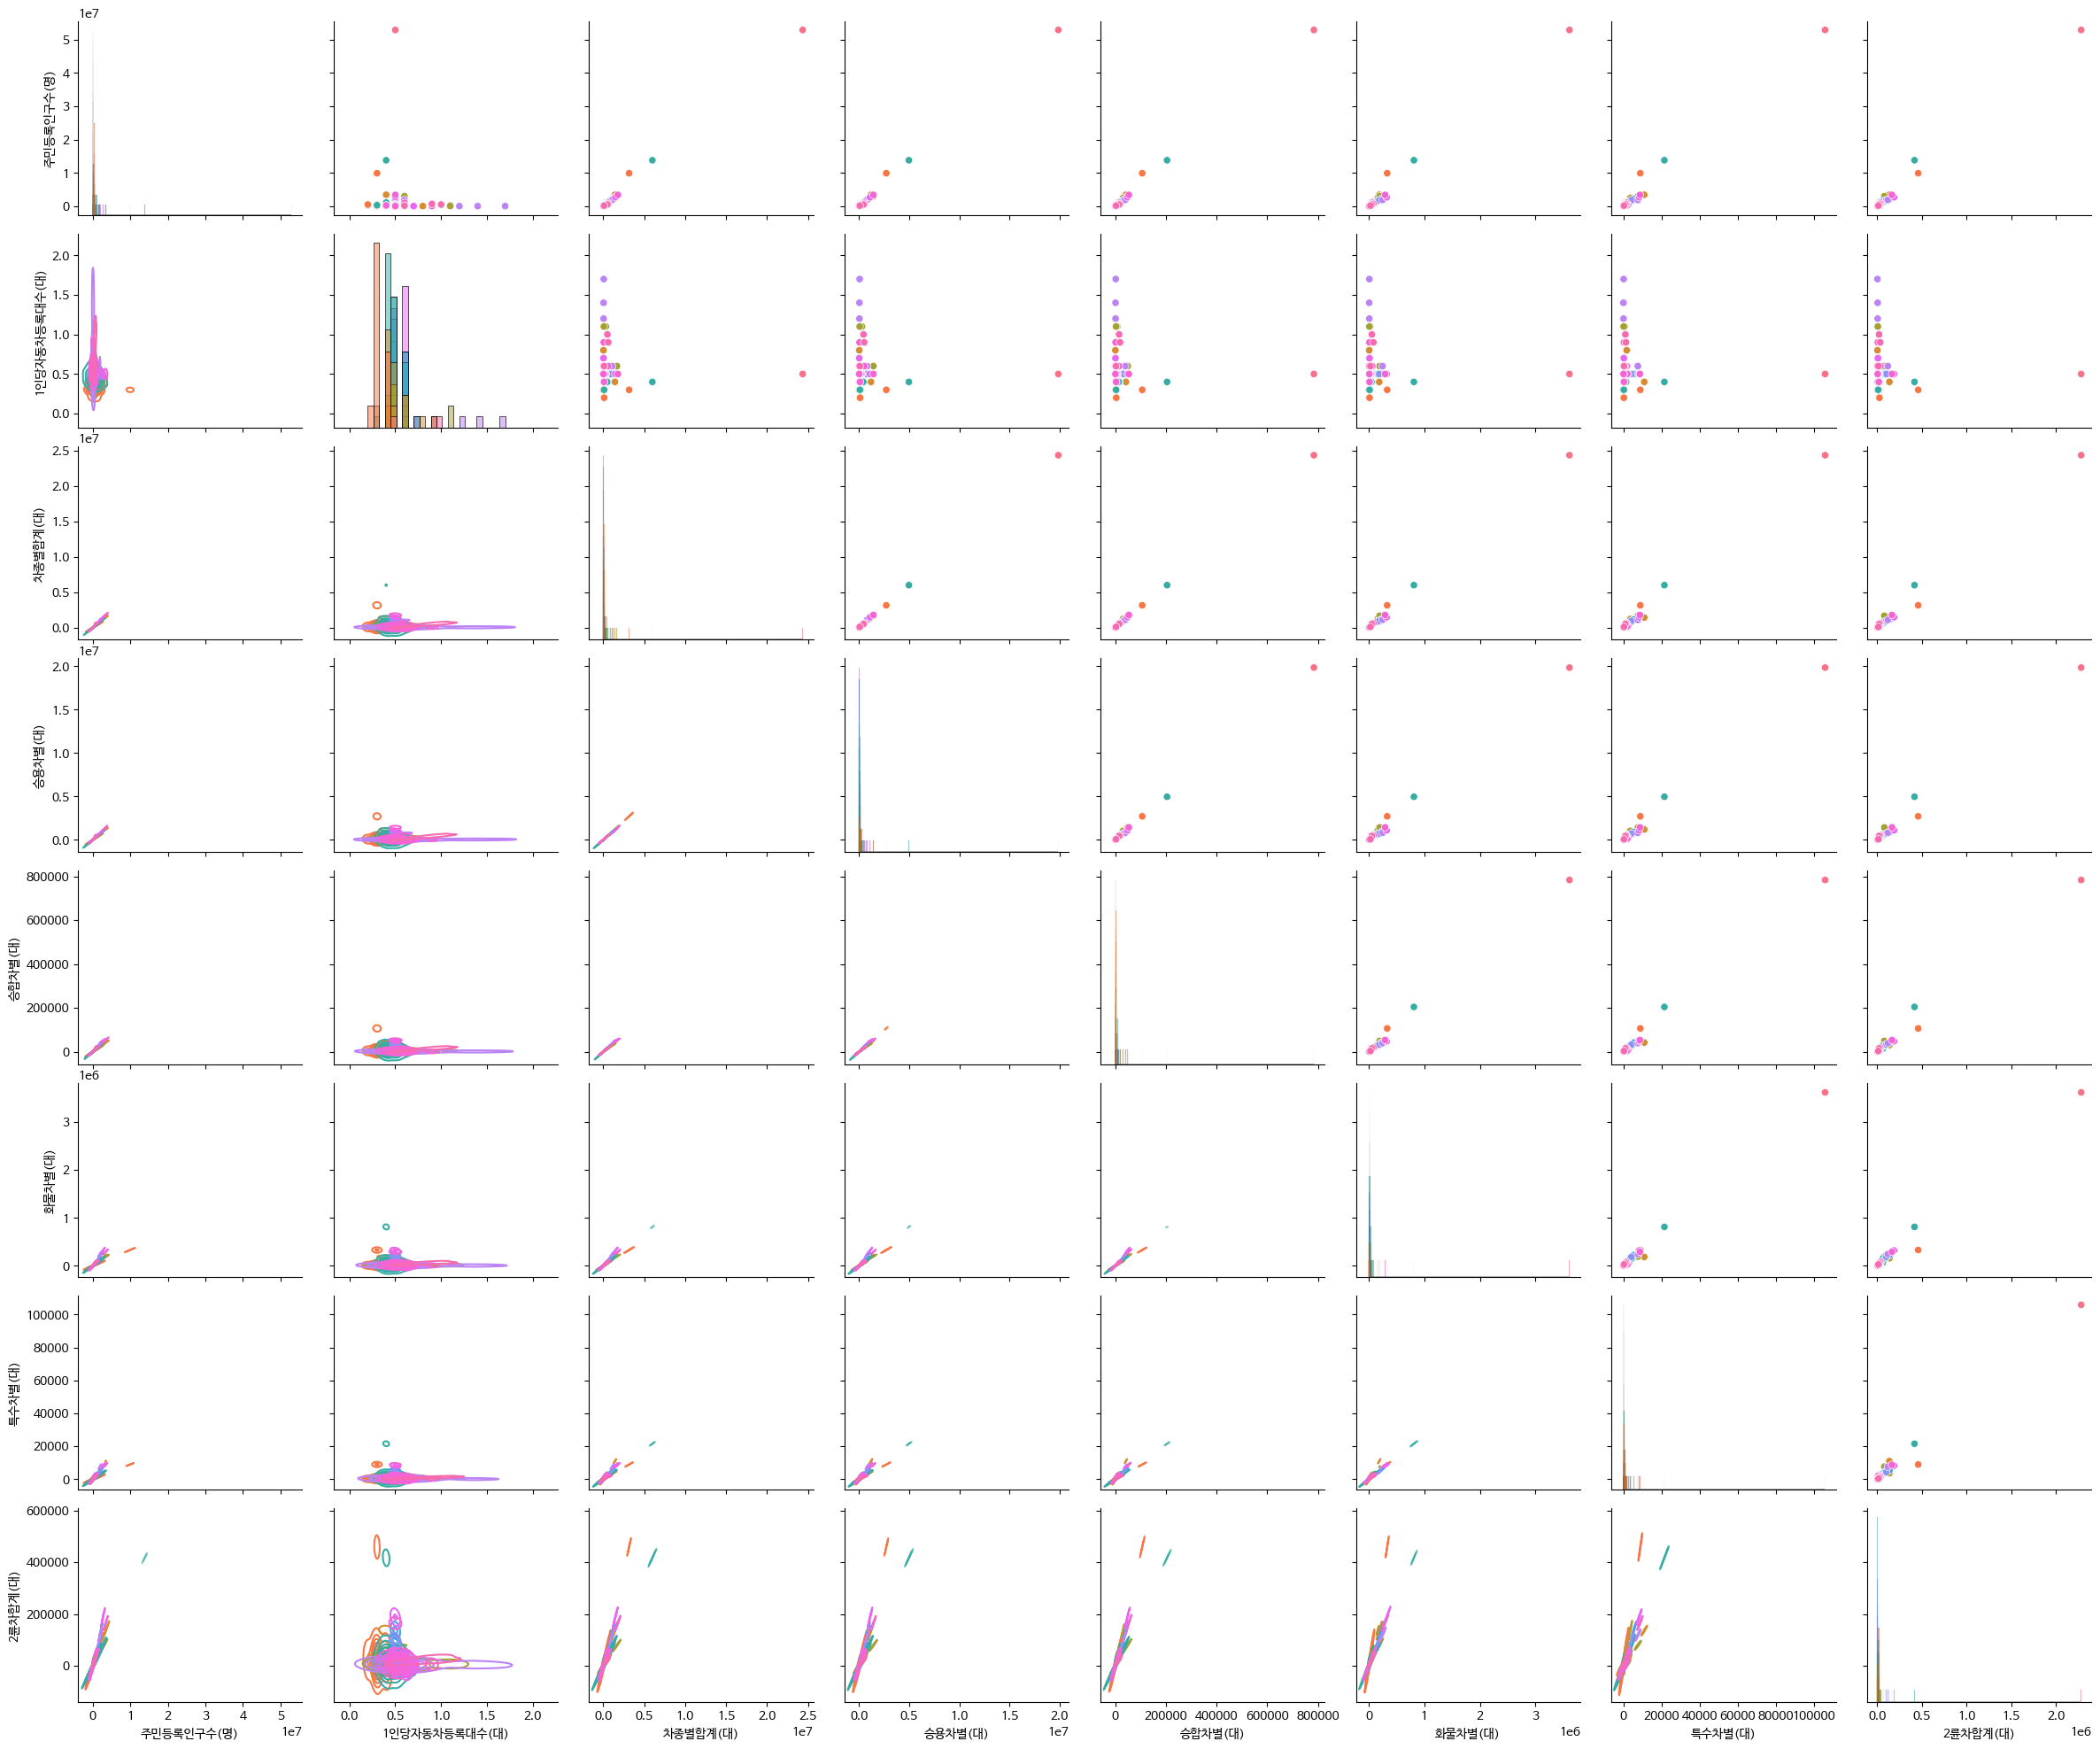

In [26]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "행정구역별(1)")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

In [27]:
corr_mat = np.round(data[num_columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

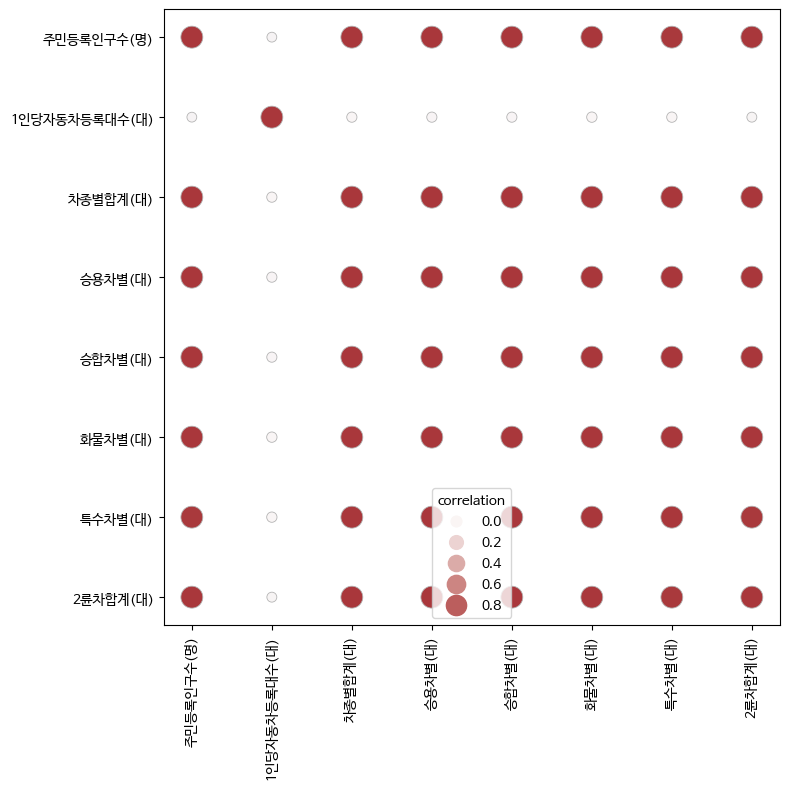

In [28]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
  label.set_rotation(90)

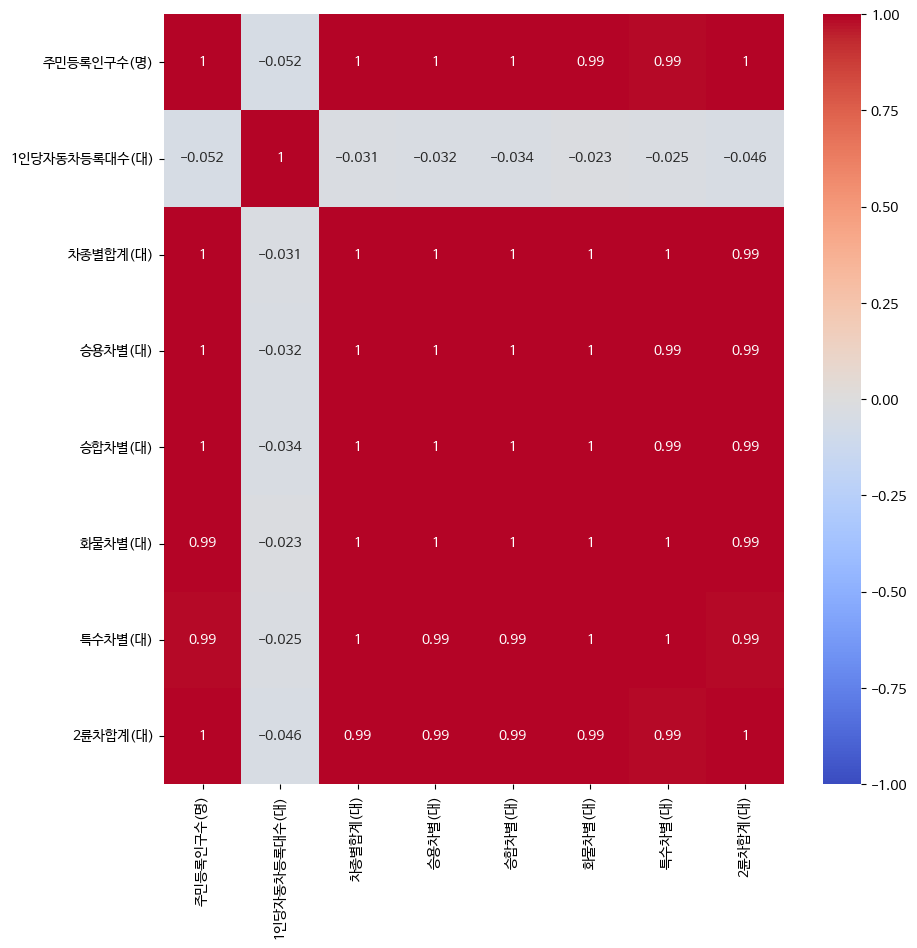

In [29]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.show()

<Figure size 1000x1000 with 0 Axes>

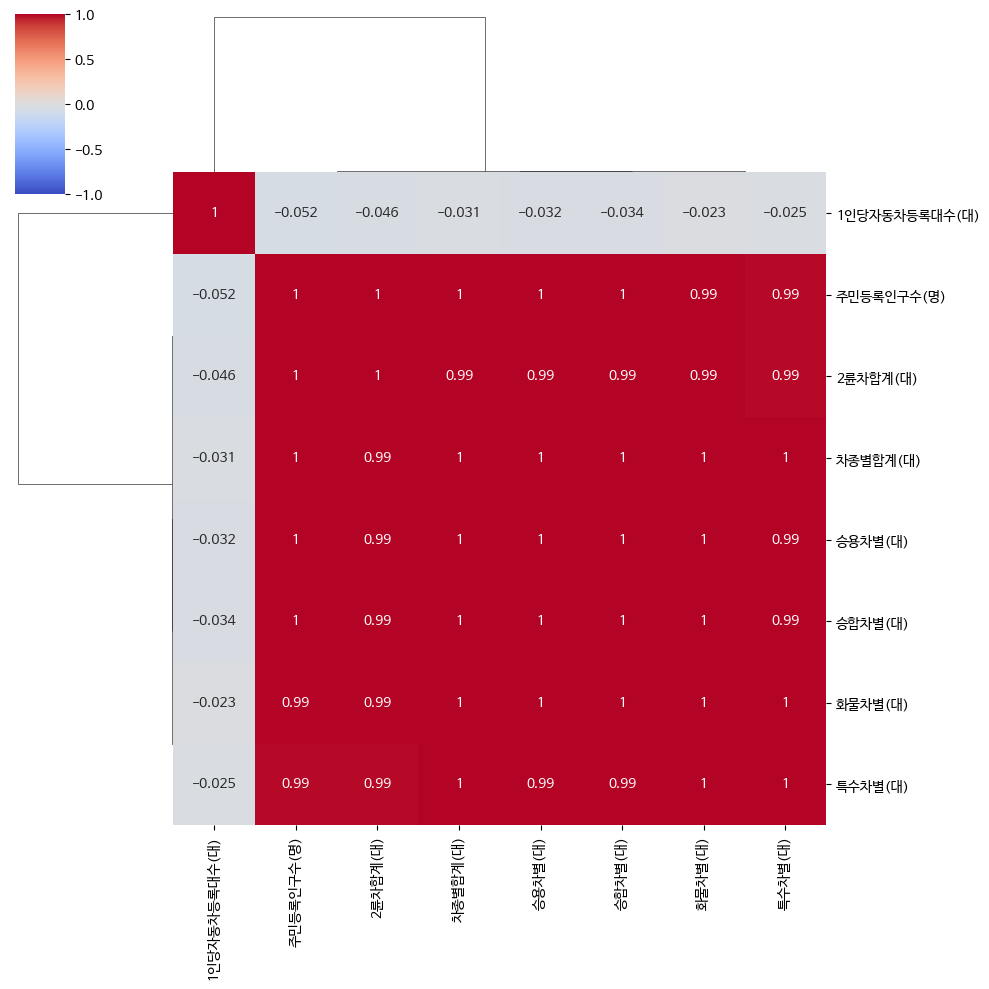

In [30]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")